In [1]:
import math
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Cylinder radius
R = 3
# cylinder center
cx = 0
cy = 4

# compute radial position
def radial(x,y):
  # switch x and y to get the 0 to the contact point
  phi = math.atan2(x-cx, -y+cy)
  return phi*R

def load(filename):
  df = pd.read_csv(filename)
  xy = np.array([df['x'],df['y']]).T
  df['radial'] = [radial(x,y) for x,y in xy]
  return df.sort_values('radial')


In [70]:
# load and prepare data
df1 = load('cylinder_friction_surface_FINAL.csv')
df2 = load('cylinder_friction_penalty_surface_FINAL.csv')
#df3 = load('cylinder_friction_penalty_al_surface_FINAL.csv')


In [9]:
# analytical solutions
a = 0.09
mu = 0.4
Q = 0
P = -2.492000e+03
c = a

def p(r):
  p0 = 18200
  return (1-r**2/a**2)**0.5*p0 if r**2<a**2 else 0

def pa(rs):
  return [p(r) for r in rs]

# def qa(rs):
#   return [mu*p0*((1-r**2/a**2)**0.5) if r**2<a**2 else 0 or r in rs]
#   return [0.4*p(r) if  for r in rs]
  
  

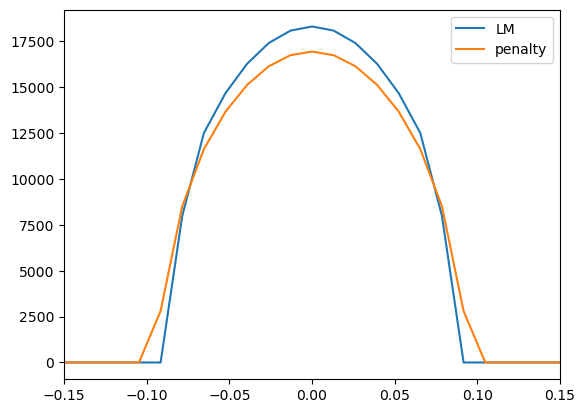

In [71]:
plt.plot(df1['radial'], df1['frictionless_normal_lm'], label='LM')
plt.plot(df2['radial'], df2['penalty_normal_pressure'], label='penalty')
#plt.plot(r3, p3, label='penalty+AL')
#plt.plot(r1, pa(r1), '--', label='analytical')
plt.xlim(-0.15,0.15)
plt.legend()

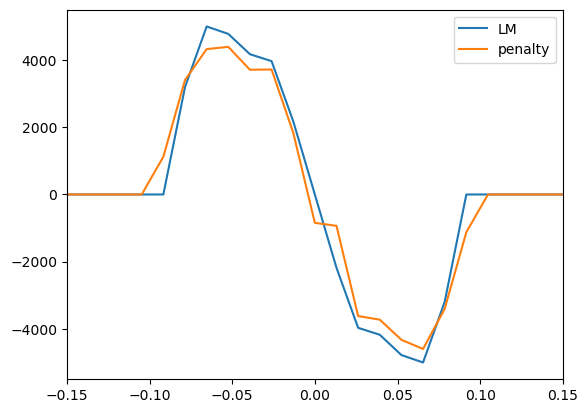

In [72]:
plt.plot(df1['radial'], df1['tangential_lm'], label='LM')
plt.plot(df2['radial'], df2['penalty_frictional_pressure'], label='penalty')
#plt.plot(r3, q3, label='penalty+AL')
plt.xlim(-0.15,0.15)
plt.legend()

In [55]:
a = 1.2-abs(np.array(r1))
b = a>0

In [56]:
b

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [107]:
len(r1), len(r2), len(r3)

(121, 241, 241)

(-0.15, 0.15)

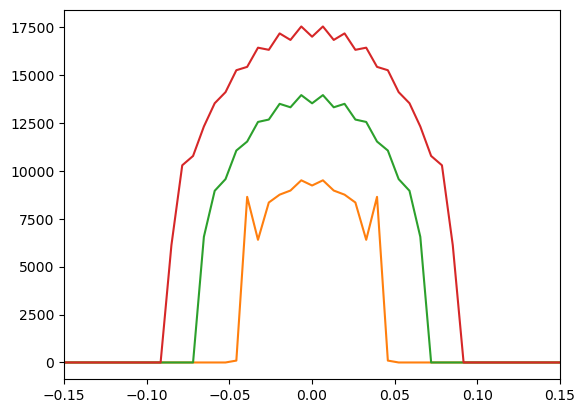

In [83]:
files = glob.glob("cylinder_frictionless_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    df = load(filename)
    plt.plot(df['radial'],df['penalty_normal_pressure']) #, "-o")
  except:
    pass
  
plt.xlim(-0.15,0.15)
  

(-0.15, 0.15)

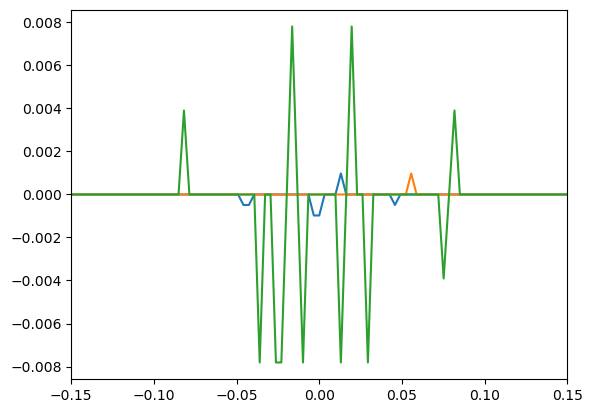

In [60]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,q)
  except:
    pass
  
plt.xlim(-0.15,0.15)


(-0.15, 0.15)

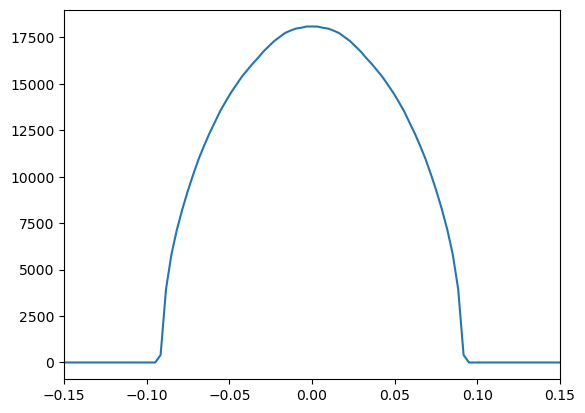

In [13]:
files = glob.glob("cylinder_friction_penalty_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)


(-0.15, 0.15)

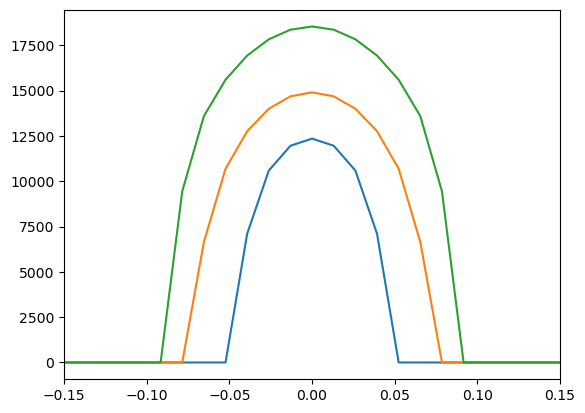

In [14]:
files = glob.glob("cylinder_friction_penalty_al_surface_????.csv")
files.sort()
for filename in files:
  try:
    r,p,q  = load_rpq(filename, 'penalty_normal_pressure', 'penalty_frictional_pressure')
    plt.plot(r,p)
  except:
    pass
  
plt.xlim(-0.15,0.15)
  

Text(0.5, 1.0, 'normal_gap updates')

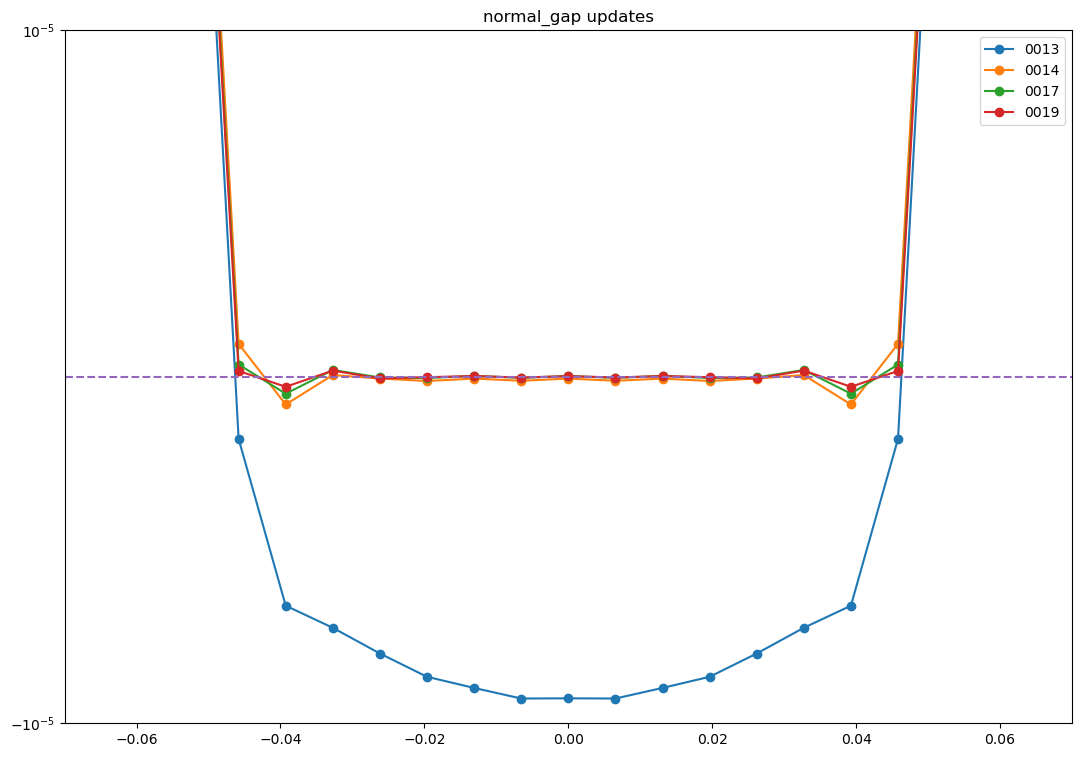

In [260]:
files = glob.glob("cylinder_frictionless_penalty_al_surface_0001_001[3479].csv")
# files = glob.glob("cylinder_frictionless_penalty_al_surface_00??.csv")
files.sort()

plt.figure(figsize=(13,9))
for filename in files:
  try:
    df = load(filename)
    plt.plot(df['radial'],df['normal_gap'], 'o-', label=filename[-8:-4])
  except:
    pass
  
plt.plot([-1,1],[0,0], '--')

plt.yscale('symlog')
plt.xlim(-0.07,0.07)
plt.ylim(-1e-5,1e-5)
plt.legend(loc='upper right')
plt.title('normal_gap updates')
  

Text(0.5, 1.0, 'normal_lm updates')

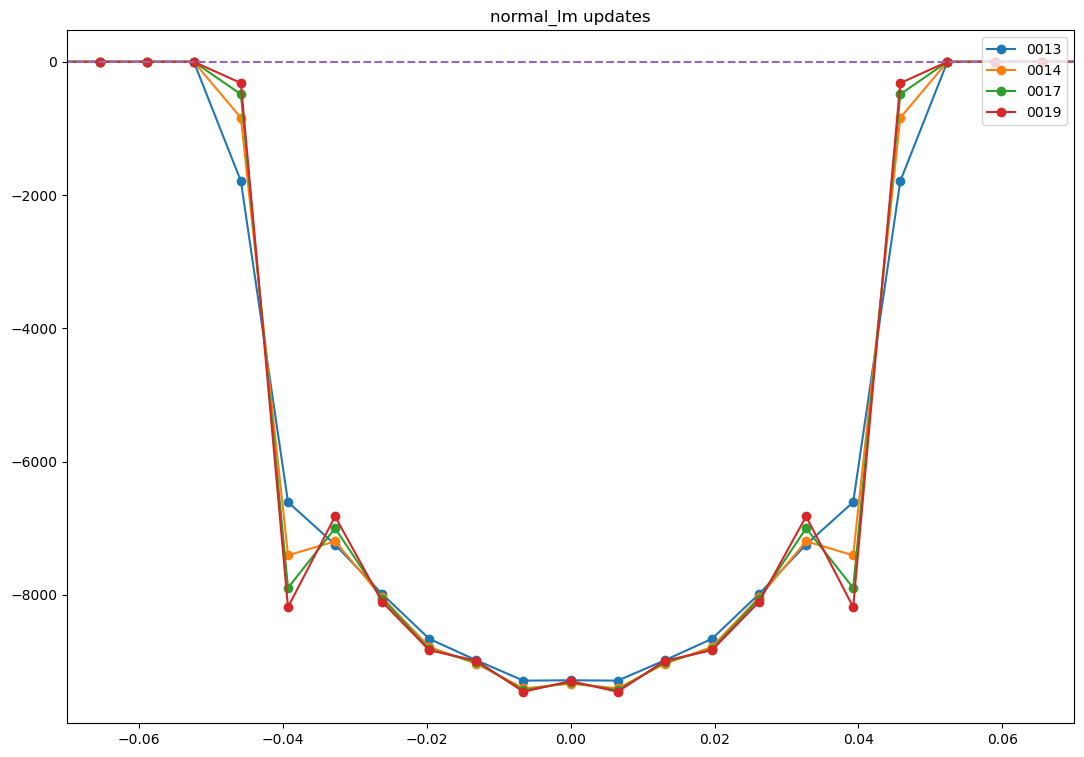

In [253]:
#Plot absolute gap distance
files = glob.glob("cylinder_frictionless_penalty_al_surface_0001_001[3479].csv")
# files = glob.glob("cylinder_frictionless_penalty_al_surface_0001.csv")
files.sort()

plt.figure(figsize=(13,9))
for filename in files:
  try:
    df = load(filename)
    plt.plot(df['radial'],df['normal_lm'], 'o-', label=filename[-8:-4])
  except:
    pass

plt.plot([-1,1],[0,0], '--')

#plt.yscale('symlog')
plt.xlim(-0.07,0.07)
# plt.ylim(-1e-4,1e-4)
plt.legend(loc='upper right')
plt.title('normal_lm updates')


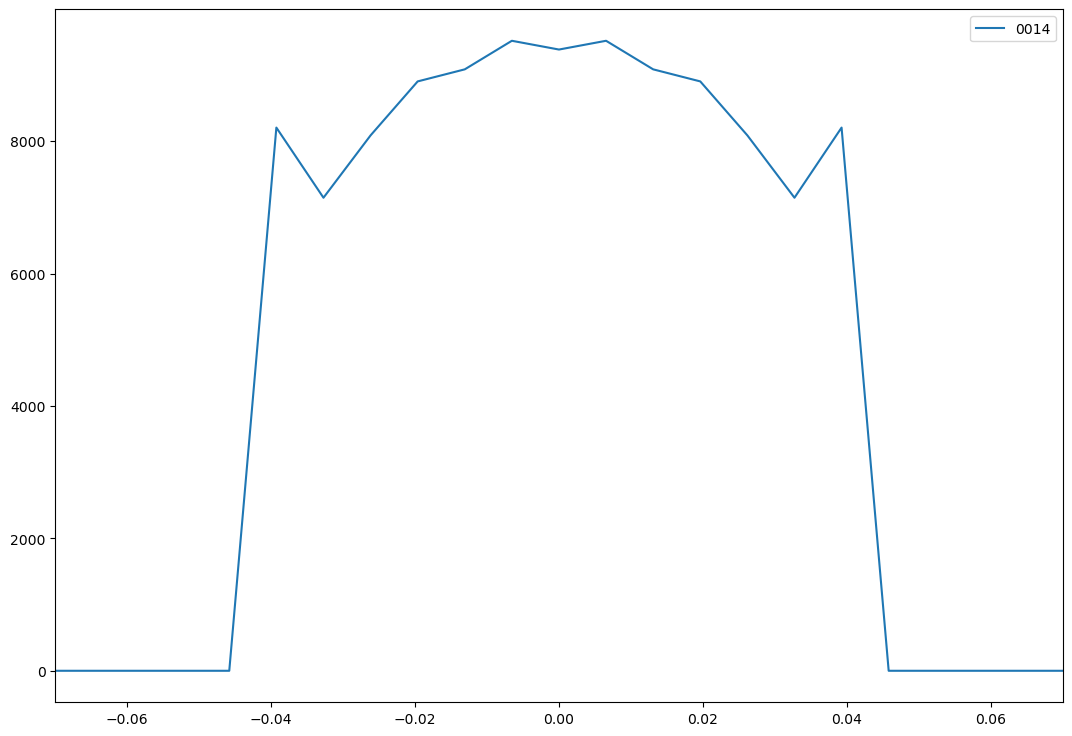

In [254]:
#Plot absolute gap distance
files = glob.glob("cylinder_frictionless_penalty_al_surface_0001_0014.csv")
files.sort()

plt.figure(figsize=(13,9))
for filename in files:
  try:
    df = load(filename)
    plt.plot(df['radial'],abs(np.array(df['penalty_normal_pressure'])), label=filename[-8:-4])
  except:
    pass
  
plt.xlim(-0.07,0.07)
plt.legend(loc='upper right')

In [125]:
"cylinder_frictionless_penalty_al_surface_0003_0001.csv"[-8:-4]

'0001'

In [263]:
i11 = load("cylinder_frictionless_penalty_al_surface_0001_0011.csv")
i12 = load("cylinder_frictionless_penalty_al_surface_0001_0012.csv")
i13 = load("cylinder_frictionless_penalty_al_surface_0001_0013.csv")
i14 = load("cylinder_frictionless_penalty_al_surface_0001_0014.csv")


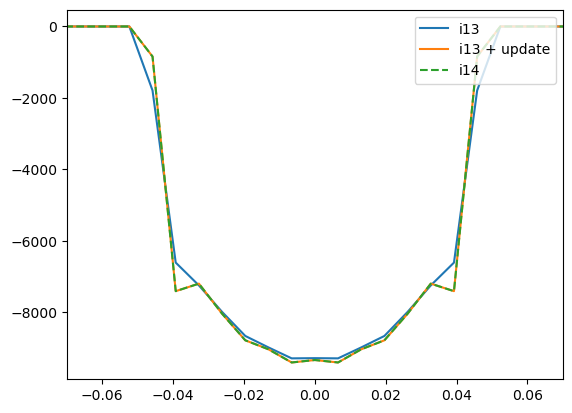

In [262]:
penalty = 1e9

updated_lm = [lm if lm < 0 else 0 for lm in i13['normal_lm'] + penalty * i14['normal_gap']]
  
plt.plot(i13['radial'],i13['normal_lm'], label='i13')
plt.plot(i13['radial'],updated_lm, label='i13 + update')
plt.plot(i14['radial'],i14['normal_lm'], '--', label='i14')

plt.xlim(-0.07,0.07)
# plt.ylim(-10000,1000)
plt.legend(loc='upper right')

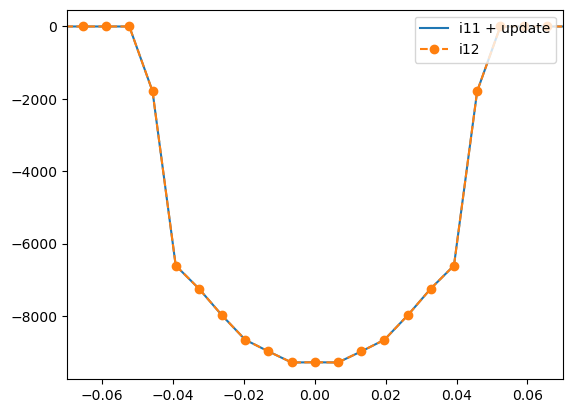

In [266]:
penalty = 1e9

updated_lm = [lm if lm < 0 else 0 for lm in penalty * i12['normal_gap']]
  
plt.plot(i11['radial'],updated_lm, label='i11 + update')
plt.plot(i12['radial'],i12['normal_lm'], 'o--', label='i12')

plt.xlim(-0.07,0.07)
# plt.ylim(-10000,1000)
plt.legend(loc='upper right')